### 考虑如何生成函数，机器生成具体的函数

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.

In [3]:
X, y = data['data'],data['target']

In [4]:
X[0],y[0]

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]), 24.0)

In [5]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [8]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

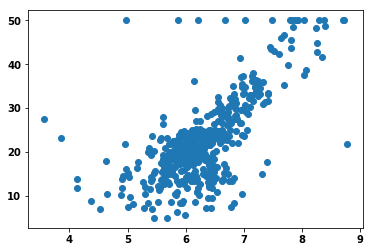

In [9]:
draw_rm_and_price()

In [10]:
import random

In [11]:
def price(rm,k,b):
    """f(x) = kx+b"""
    return k * rm + b

In [12]:
k = random.randint(-100,100)
b = random.randint(-100,100)

In [13]:
X_rm = X[:,5]

In [14]:
price_predict = [price(r,k,b) for r in X_rm]

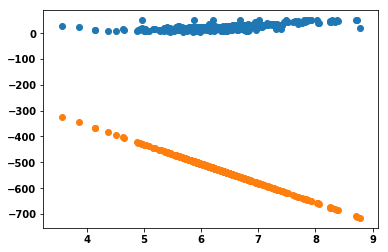

In [15]:
draw_rm_and_price()
plt.scatter(X_rm,price_predict)
# 散点图 plt.scatter(x,y)
# 写在同一块，放在一个图

In [16]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
    

In [17]:
loss(price_predict,y)

305896.9532003458

## 1st random ajust

In [18]:
X_rm = X[:,5]
trying_times = 100

min_loss = float("inf")
best_k,best_b = None,None
for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_predict = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(price_predict,y)
    if current_loss<min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
    print('current_loss:{},y = {} * x + {}'.format(current_loss,k,b))
print('min_loss:{},y = {} * x + {}'.format(min_loss,best_k,best_b))

current_loss:130043.87115067826,y = -56.11294040771835 * x + 17.544264505703538
current_loss:11999.893881869311,y = -25.138023202905586 * x + 73.84527045764716
current_loss:4872.00605590791,y = 26.798668853612753 * x + -77.51957367277988
current_loss:19437.99014889234,y = 13.21277742967115 * x + 78.72917823320512
current_loss:351550.3778174354,y = -98.01374563930865 * x + 50.4200980721929
current_loss:354724.6116605817,y = -97.17576379893778 * x + 42.38654199894242
current_loss:415928.91686570994,y = -95.56204769049505 * x + -17.5880716444955
current_loss:2530.3480649861904,y = -5.16189570122134 * x + 6.121587700251169
current_loss:180597.89141845857,y = 62.360935388182895 * x + 53.886261135003025
current_loss:84794.47959134445,y = -45.59476726623859 * x + 20.501947003920606
current_loss:266889.65278203896,y = -65.91098037750736 * x + -77.12177214096671
current_loss:227721.6743323909,y = -81.13935950790119 * x + 59.53082849843267
current_loss:171938.96417028364,y = 57.009493781871555 *

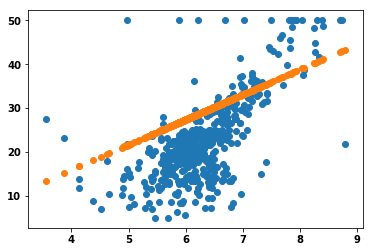

In [19]:
price_predict = [price(r,best_k,best_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_predict)

## 2nd direction ajusting 监督学习

In [20]:
import numpy as np
import math

In [21]:
X_rm = X[:,5]
trying_times = 10000

# min_loss = float("inf")
min_loss = 100000
best_k,best_b = None,None
k = random.random() * 200 - 100
b = random.random() * 200 - 100

direction = [
    (1,1),(1,-1),(-1,1),(-1,-1)
]
current_direction = random.choice(direction)

for i in range(trying_times):
    k = k+current_direction[0]*np.log(1+current_loss/2)
    b = b+current_direction[1]*np.log(1+current_loss/2)
    price_predict = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(price_predict,y)
    if current_loss<min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
        print('{} time: update_loss:{},y = {} * x + {}'.format(i,current_loss,k,b))
    else:current_direction = random.choice(list(set(direction)-{current_direction}))
    
print('min_loss:{},y = {} * x + {}'.format(min_loss,best_k,best_b))

107 time: update_loss:92155.98089339581,y = -61.71105235402891 * x + 110.96187286819129
108 time: update_loss:60703.35592126024,y = -50.97293996760795 * x + 100.22376048177033
109 time: update_loss:36650.34379599118,y = -40.65229993907777 * x + 89.90312045324015
110 time: update_loss:19390.850000849456,y = -30.836214463590295 * x + 80.08703497775268
111 time: update_loss:8206.248531411888,y = -21.656701923689763 * x + 70.90752243785215
112 time: update_loss:2206.870834115303,y = -13.336954258129447 * x + 62.58777477229184
113 time: update_loss:206.26723089583803,y = -6.329864709538707 * x + 55.580685223701096
116 time: update_loss:132.93967542530237,y = -3.739729884422843 * x + 48.87947037189554
124 time: update_loss:110.16487177199122,y = -2.2662935602756216 * x + 35.07618982494779
133 time: update_loss:89.11920698752103,y = 0.1750190138807879 * x + 18.93201051229187
3279 time: update_loss:66.42583186785193,y = 15.861856865878295 * x + -77.71170802796141
3286 time: update_loss:58.5983

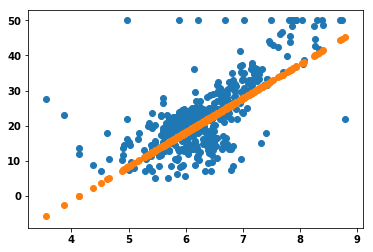

In [22]:
price_predict = [price(r,best_k,best_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_predict)

## loss

 $$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n}\sum(y_{i}-(kx_{i} + b_{i}))^2$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i-\hat{y_i})x_i $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum y_i-\hat{y_i} $$

In [23]:
def partial_k(x,y,y_hat):
    n = len(y)
    
    return -sum((y_i - y_hat_i) * x_i for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)))*2/n

In [27]:
partial_k(X_rm,y,price_predict)

20.01343196031407

In [30]:
def partial_b(y,y_hat):
    n = len(y)
    
    return -sum((y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat)))*2/n

In [32]:
partial_b(y,price_predict)

3.2796239016230984

In [54]:
X_rm_ = X[:,5]
trying_times_ = 10000

min_loss_ = float("inf")
# min_loss_ = 100000
best_k_,best_b_ = None,None
k_ = random.random() * 200 - 100
b_ = random.random() * 200 - 100
learning_rate = 0.01

for i in range(trying_times_):
    price_predict_ = [price(r,k_,b_) for r in X_rm_]
   
    current_loss = loss(price_predict_,y)
#     print(current_loss)
    if current_loss<min_loss_:
        min_loss_ = current_loss
        best_b_,best_k_ = b_,k_
        if i%100==0:
            print('{} time: update_loss:{},y = {} * x + {}'.format(i,current_loss,k_,b_))
    
    gradient_k = partial_k(X_rm_,y,price_predict_)
    gradient_b = partial_b(y,price_predict_)

    k_ = k_ - gradient_k * learning_rate
    b_ = b_ - gradient_b * learning_rate
    
print('min_loss:{},y = {} * x + {}'.format(min_loss_,best_k_,best_b_))

0 time: update_loss:84772.02663903208,y = 56.34901799727359 * x + -42.41407557872216
100 time: update_loss:46.174300069721944,y = 11.374226921952973 * x + -49.123831129604085
200 time: update_loss:46.05343235388222,y = 11.320234086495196 * x + -48.78037633157994
300 time: update_loss:45.93824079710618,y = 11.26752429459271 * x + -48.44508312502256
400 time: update_loss:45.82845883704919,y = 11.21606705700095 * x + -48.11775756424925
500 time: update_loss:45.723832429600044,y = 11.165832608997952 * x + -47.79821031235106
600 time: update_loss:45.62411946100266,y = 11.116791893167331 * x + -47.486256531673305
700 time: update_loss:45.52908918758596,y = 11.068916542590449 * x + -47.18171577689896
800 time: update_loss:45.438521701804746,y = 11.022178864437958 * x + -46.88441189067253
900 time: update_loss:45.352207423356134,y = 10.97655182395127 * x + -46.59417290170428
1000 time: update_loss:45.26994661419448,y = 10.932009028804677 * x + -46.310830925295804
1100 time: update_loss:45.1915

9400 time: update_loss:43.629916569420516,y = 9.344804269681118 * x + -36.21443414698549
9500 time: update_loss:43.628537547201184,y = 9.339037048471669 * x + -36.17774817228425
9600 time: update_loss:43.62722328627411,y = 9.3334068750009 * x + -36.141933974421725
9700 time: update_loss:43.625970745335884,y = 9.327910492573436 * x + -36.106970837174295
9800 time: update_loss:43.62477702590794,y = 9.322544721883462 * x + -36.07283853660249
9900 time: update_loss:43.623639365629565,y = 9.317306459175695 * x + -36.039517329352684
min_loss:43.62256571807935,y = 9.312243205902739 * x + -36.007309377770504


In [53]:
print(partial_k(X_rm,y,price_predict))
print(partial_b(y,price_predict))

-20.01343196031407
-3.2796239016230984


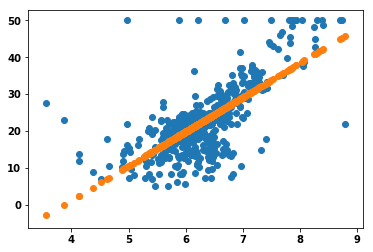

In [55]:
price_predict_ = [price(r,best_k_,best_b_) for r in X_rm_]
draw_rm_and_price()
plt.scatter(X_rm_,price_predict_)

In [ ]:
使用梯度下降，loss下降的更快。
模型复杂度是否真正符合要解决的问题
删除 outliner 离群值
初始化问题
定义函数
loss的定义方式
快速求导 反向传播
希望拟合出的二次函数比较平缓 a比较小